# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# import dependencies
import random
import pandas as pd 
import time 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np
from datetime import datetime
import openweathermapy as owm

In [2]:
import csv

## Generate Cities List

In [3]:
from citipy import citipy 
cities = []

while len(cities)<600:
    x = (random.choice(range(-90,90))) # randomly generate numbers in range -90 & 90 for latitude
    y = (random.choice(range(-180,180))) # randomly generagte numbers in range -180 & 180 for longitude
    city = citipy.nearest_city(x,y).city_name # look up city to match the lat & long randomly generated
    if city not in cities:
        cities.append(city)
        
len(cities)        

600

In [4]:
from api_keys import api_key
settings = {"units": "imperial", "appid": api_key}


# Initialize data frame to store data from API calls
WeatherPy_df =pd.DataFrame(columns = ["City","Cloudiness", "Country",
                                    "Date", "Max Temp", "Wind Speed", 
                                    "Lat","Lng", "Humidity"])


In [5]:
count = 1 # counter to count the number of calls to API
err = 0 # error count to record how many cities the API responds back with no data.
sets = 0 # counter to count the number of call sets
index = 0 # index for the data frame WeatherPy data frame
#Get current time
t0 =time.time()
print(f'Beginning Data Retrieval \n ........................')
for city in cities:
    try:
        city1 = city.replace(" ", "%20") # remove space in city name so the URL retrieved is not broken.
        print(f'Processing Record {count} of Set {sets} | {city}' )
        print(f'{owm.BASE_URL}weather?q={city1}&units=imperial&APPID={api_key}')
        city_stats = owm.get_current(city, **settings)
        WeatherPy_df.set_value(index, "City", city_stats["name"])
        WeatherPy_df.set_value(index, "Cloudiness", city_stats("clouds.all"))
        WeatherPy_df.set_value(index, "Country", city_stats("sys.country"))
        WeatherPy_df.set_value(index, "Date", city_stats("dt"))
        WeatherPy_df.set_value(index, "Max Temp", city_stats("main.temp_max"))
        WeatherPy_df.set_value(index, "Wind Speed", city_stats("wind.speed"))
        WeatherPy_df.set_value(index, "Lat", city_stats("coord.lat"))
        WeatherPy_df.set_value(index, "Lng", city_stats("coord.lon"))
        WeatherPy_df.set_value(index, "Humidity", city_stats("main.humidity"))
        index = index +1 
    except Exception as e:
        print(e)
        err= err+1
    count = count+1
    if count == 51: # loop to limit 50 API calls per minute. The OpenWeatherMap API limit is 60 calls/min
        t1=time.time()
        count = 1 
        sets = sets+1
        time.sleep(60-(t1-t0))
        t0=time.time()

print("end of stats loop")
print(f'Could not get data for {err} cities')

Beginning Data Retrieval 
 ........................
Processing Record 1 of Set 0 | sao jose da coroa grande
http://api.openweathermap.org/data/2.5/weather?q=sao%20jose%20da%20coroa%20grande&units=imperial&APPID=17b5773a9b9ba5bbb54b28d10c47a0a7


C:\Users\vijay\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\vijay\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  from ipykernel import kernelapp as app
C:\Users\vijay\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  app.launch_new_instance()
C:\Users\vijay\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\vijay\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:18: Fut

Processing Record 2 of Set 0 | sisimiut
http://api.openweathermap.org/data/2.5/weather?q=sisimiut&units=imperial&APPID=17b5773a9b9ba5bbb54b28d10c47a0a7
Processing Record 3 of Set 0 | cape town
http://api.openweathermap.org/data/2.5/weather?q=cape%20town&units=imperial&APPID=17b5773a9b9ba5bbb54b28d10c47a0a7
Processing Record 4 of Set 0 | hamilton
http://api.openweathermap.org/data/2.5/weather?q=hamilton&units=imperial&APPID=17b5773a9b9ba5bbb54b28d10c47a0a7
Processing Record 5 of Set 0 | sorvag
http://api.openweathermap.org/data/2.5/weather?q=sorvag&units=imperial&APPID=17b5773a9b9ba5bbb54b28d10c47a0a7
HTTP Error 404: Not Found
Processing Record 6 of Set 0 | cidreira
http://api.openweathermap.org/data/2.5/weather?q=cidreira&units=imperial&APPID=17b5773a9b9ba5bbb54b28d10c47a0a7
Processing Record 7 of Set 0 | hilo
http://api.openweathermap.org/data/2.5/weather?q=hilo&units=imperial&APPID=17b5773a9b9ba5bbb54b28d10c47a0a7
Processing Record 8 of Set 0 | iquique
http://api.openweathermap.org/d

Processing Record 4 of Set 1 | viedma
http://api.openweathermap.org/data/2.5/weather?q=viedma&units=imperial&APPID=17b5773a9b9ba5bbb54b28d10c47a0a7
Processing Record 5 of Set 1 | payyannur
http://api.openweathermap.org/data/2.5/weather?q=payyannur&units=imperial&APPID=17b5773a9b9ba5bbb54b28d10c47a0a7
Processing Record 6 of Set 1 | dingle
http://api.openweathermap.org/data/2.5/weather?q=dingle&units=imperial&APPID=17b5773a9b9ba5bbb54b28d10c47a0a7
Processing Record 7 of Set 1 | juchitlan
http://api.openweathermap.org/data/2.5/weather?q=juchitlan&units=imperial&APPID=17b5773a9b9ba5bbb54b28d10c47a0a7
Processing Record 8 of Set 1 | port alfred
http://api.openweathermap.org/data/2.5/weather?q=port%20alfred&units=imperial&APPID=17b5773a9b9ba5bbb54b28d10c47a0a7
Processing Record 9 of Set 1 | qaanaaq
http://api.openweathermap.org/data/2.5/weather?q=qaanaaq&units=imperial&APPID=17b5773a9b9ba5bbb54b28d10c47a0a7
Processing Record 10 of Set 1 | taolanaro
http://api.openweathermap.org/data/2.5/weath

Processing Record 6 of Set 2 | new norfolk
http://api.openweathermap.org/data/2.5/weather?q=new%20norfolk&units=imperial&APPID=17b5773a9b9ba5bbb54b28d10c47a0a7
Processing Record 7 of Set 2 | ilovlya
http://api.openweathermap.org/data/2.5/weather?q=ilovlya&units=imperial&APPID=17b5773a9b9ba5bbb54b28d10c47a0a7
Processing Record 8 of Set 2 | coquimbo
http://api.openweathermap.org/data/2.5/weather?q=coquimbo&units=imperial&APPID=17b5773a9b9ba5bbb54b28d10c47a0a7
Processing Record 9 of Set 2 | bur gabo
http://api.openweathermap.org/data/2.5/weather?q=bur%20gabo&units=imperial&APPID=17b5773a9b9ba5bbb54b28d10c47a0a7
HTTP Error 404: Not Found
Processing Record 10 of Set 2 | maltahohe
http://api.openweathermap.org/data/2.5/weather?q=maltahohe&units=imperial&APPID=17b5773a9b9ba5bbb54b28d10c47a0a7
Processing Record 11 of Set 2 | mao
http://api.openweathermap.org/data/2.5/weather?q=mao&units=imperial&APPID=17b5773a9b9ba5bbb54b28d10c47a0a7
Processing Record 12 of Set 2 | batagay-alyta
http://api.ope

Processing Record 9 of Set 3 | kalmunai
http://api.openweathermap.org/data/2.5/weather?q=kalmunai&units=imperial&APPID=17b5773a9b9ba5bbb54b28d10c47a0a7
Processing Record 10 of Set 3 | kenai
http://api.openweathermap.org/data/2.5/weather?q=kenai&units=imperial&APPID=17b5773a9b9ba5bbb54b28d10c47a0a7
Processing Record 11 of Set 3 | vicente guerrero
http://api.openweathermap.org/data/2.5/weather?q=vicente%20guerrero&units=imperial&APPID=17b5773a9b9ba5bbb54b28d10c47a0a7
Processing Record 12 of Set 3 | marathon
http://api.openweathermap.org/data/2.5/weather?q=marathon&units=imperial&APPID=17b5773a9b9ba5bbb54b28d10c47a0a7
Processing Record 13 of Set 3 | svetlogorsk
http://api.openweathermap.org/data/2.5/weather?q=svetlogorsk&units=imperial&APPID=17b5773a9b9ba5bbb54b28d10c47a0a7
Processing Record 14 of Set 3 | anadyr
http://api.openweathermap.org/data/2.5/weather?q=anadyr&units=imperial&APPID=17b5773a9b9ba5bbb54b28d10c47a0a7
Processing Record 15 of Set 3 | jeremie
http://api.openweathermap.org

Processing Record 13 of Set 4 | yulara
http://api.openweathermap.org/data/2.5/weather?q=yulara&units=imperial&APPID=17b5773a9b9ba5bbb54b28d10c47a0a7
Processing Record 14 of Set 4 | birao
http://api.openweathermap.org/data/2.5/weather?q=birao&units=imperial&APPID=17b5773a9b9ba5bbb54b28d10c47a0a7
Processing Record 15 of Set 4 | katsuura
http://api.openweathermap.org/data/2.5/weather?q=katsuura&units=imperial&APPID=17b5773a9b9ba5bbb54b28d10c47a0a7
Processing Record 16 of Set 4 | nguiu
http://api.openweathermap.org/data/2.5/weather?q=nguiu&units=imperial&APPID=17b5773a9b9ba5bbb54b28d10c47a0a7
HTTP Error 404: Not Found
Processing Record 17 of Set 4 | taltal
http://api.openweathermap.org/data/2.5/weather?q=taltal&units=imperial&APPID=17b5773a9b9ba5bbb54b28d10c47a0a7
Processing Record 18 of Set 4 | gardan diwal
http://api.openweathermap.org/data/2.5/weather?q=gardan%20diwal&units=imperial&APPID=17b5773a9b9ba5bbb54b28d10c47a0a7
HTTP Error 404: Not Found
Processing Record 19 of Set 4 | nanortal

Processing Record 16 of Set 5 | matata
http://api.openweathermap.org/data/2.5/weather?q=matata&units=imperial&APPID=17b5773a9b9ba5bbb54b28d10c47a0a7
Processing Record 17 of Set 5 | mlonggo
http://api.openweathermap.org/data/2.5/weather?q=mlonggo&units=imperial&APPID=17b5773a9b9ba5bbb54b28d10c47a0a7
Processing Record 18 of Set 5 | cabrero
http://api.openweathermap.org/data/2.5/weather?q=cabrero&units=imperial&APPID=17b5773a9b9ba5bbb54b28d10c47a0a7
Processing Record 19 of Set 5 | udachnyy
http://api.openweathermap.org/data/2.5/weather?q=udachnyy&units=imperial&APPID=17b5773a9b9ba5bbb54b28d10c47a0a7
Processing Record 20 of Set 5 | denpasar
http://api.openweathermap.org/data/2.5/weather?q=denpasar&units=imperial&APPID=17b5773a9b9ba5bbb54b28d10c47a0a7
Processing Record 21 of Set 5 | upernavik
http://api.openweathermap.org/data/2.5/weather?q=upernavik&units=imperial&APPID=17b5773a9b9ba5bbb54b28d10c47a0a7
Processing Record 22 of Set 5 | kissidougou
http://api.openweathermap.org/data/2.5/weath

Processing Record 20 of Set 6 | sinegorskiy
http://api.openweathermap.org/data/2.5/weather?q=sinegorskiy&units=imperial&APPID=17b5773a9b9ba5bbb54b28d10c47a0a7
Processing Record 21 of Set 6 | bolshaya vishera
http://api.openweathermap.org/data/2.5/weather?q=bolshaya%20vishera&units=imperial&APPID=17b5773a9b9ba5bbb54b28d10c47a0a7
HTTP Error 404: Not Found
Processing Record 22 of Set 6 | san cristobal
http://api.openweathermap.org/data/2.5/weather?q=san%20cristobal&units=imperial&APPID=17b5773a9b9ba5bbb54b28d10c47a0a7
Processing Record 23 of Set 6 | ratnagiri
http://api.openweathermap.org/data/2.5/weather?q=ratnagiri&units=imperial&APPID=17b5773a9b9ba5bbb54b28d10c47a0a7
Processing Record 24 of Set 6 | guangyuan
http://api.openweathermap.org/data/2.5/weather?q=guangyuan&units=imperial&APPID=17b5773a9b9ba5bbb54b28d10c47a0a7
Processing Record 25 of Set 6 | kaduy
http://api.openweathermap.org/data/2.5/weather?q=kaduy&units=imperial&APPID=17b5773a9b9ba5bbb54b28d10c47a0a7
Processing Record 26 o

Processing Record 23 of Set 7 | tubuala
http://api.openweathermap.org/data/2.5/weather?q=tubuala&units=imperial&APPID=17b5773a9b9ba5bbb54b28d10c47a0a7
Processing Record 24 of Set 7 | nyimba
http://api.openweathermap.org/data/2.5/weather?q=nyimba&units=imperial&APPID=17b5773a9b9ba5bbb54b28d10c47a0a7
Processing Record 25 of Set 7 | natal
http://api.openweathermap.org/data/2.5/weather?q=natal&units=imperial&APPID=17b5773a9b9ba5bbb54b28d10c47a0a7
Processing Record 26 of Set 7 | nouadhibou
http://api.openweathermap.org/data/2.5/weather?q=nouadhibou&units=imperial&APPID=17b5773a9b9ba5bbb54b28d10c47a0a7
Processing Record 27 of Set 7 | grand island
http://api.openweathermap.org/data/2.5/weather?q=grand%20island&units=imperial&APPID=17b5773a9b9ba5bbb54b28d10c47a0a7
Processing Record 28 of Set 7 | kautokeino
http://api.openweathermap.org/data/2.5/weather?q=kautokeino&units=imperial&APPID=17b5773a9b9ba5bbb54b28d10c47a0a7
Processing Record 29 of Set 7 | kathmandu
http://api.openweathermap.org/data

Processing Record 27 of Set 8 | mwingi
http://api.openweathermap.org/data/2.5/weather?q=mwingi&units=imperial&APPID=17b5773a9b9ba5bbb54b28d10c47a0a7
Processing Record 28 of Set 8 | coolum beach
http://api.openweathermap.org/data/2.5/weather?q=coolum%20beach&units=imperial&APPID=17b5773a9b9ba5bbb54b28d10c47a0a7
Processing Record 29 of Set 8 | charleston
http://api.openweathermap.org/data/2.5/weather?q=charleston&units=imperial&APPID=17b5773a9b9ba5bbb54b28d10c47a0a7
Processing Record 30 of Set 8 | malwan
http://api.openweathermap.org/data/2.5/weather?q=malwan&units=imperial&APPID=17b5773a9b9ba5bbb54b28d10c47a0a7
HTTP Error 404: Not Found
Processing Record 31 of Set 8 | honolulu
http://api.openweathermap.org/data/2.5/weather?q=honolulu&units=imperial&APPID=17b5773a9b9ba5bbb54b28d10c47a0a7
Processing Record 32 of Set 8 | taoudenni
http://api.openweathermap.org/data/2.5/weather?q=taoudenni&units=imperial&APPID=17b5773a9b9ba5bbb54b28d10c47a0a7
Processing Record 33 of Set 8 | firminy
http://a

Processing Record 31 of Set 9 | nigde
http://api.openweathermap.org/data/2.5/weather?q=nigde&units=imperial&APPID=17b5773a9b9ba5bbb54b28d10c47a0a7
Processing Record 32 of Set 9 | puchezh
http://api.openweathermap.org/data/2.5/weather?q=puchezh&units=imperial&APPID=17b5773a9b9ba5bbb54b28d10c47a0a7
Processing Record 33 of Set 9 | puerto madryn
http://api.openweathermap.org/data/2.5/weather?q=puerto%20madryn&units=imperial&APPID=17b5773a9b9ba5bbb54b28d10c47a0a7
Processing Record 34 of Set 9 | guiyang
http://api.openweathermap.org/data/2.5/weather?q=guiyang&units=imperial&APPID=17b5773a9b9ba5bbb54b28d10c47a0a7
Processing Record 35 of Set 9 | shenjiamen
http://api.openweathermap.org/data/2.5/weather?q=shenjiamen&units=imperial&APPID=17b5773a9b9ba5bbb54b28d10c47a0a7
Processing Record 36 of Set 9 | turukhansk
http://api.openweathermap.org/data/2.5/weather?q=turukhansk&units=imperial&APPID=17b5773a9b9ba5bbb54b28d10c47a0a7
Processing Record 37 of Set 9 | saryshagan
http://api.openweathermap.org

Processing Record 35 of Set 10 | praia
http://api.openweathermap.org/data/2.5/weather?q=praia&units=imperial&APPID=17b5773a9b9ba5bbb54b28d10c47a0a7
Processing Record 36 of Set 10 | belyy yar
http://api.openweathermap.org/data/2.5/weather?q=belyy%20yar&units=imperial&APPID=17b5773a9b9ba5bbb54b28d10c47a0a7
Processing Record 37 of Set 10 | amboasary
http://api.openweathermap.org/data/2.5/weather?q=amboasary&units=imperial&APPID=17b5773a9b9ba5bbb54b28d10c47a0a7
Processing Record 38 of Set 10 | sitka
http://api.openweathermap.org/data/2.5/weather?q=sitka&units=imperial&APPID=17b5773a9b9ba5bbb54b28d10c47a0a7
Processing Record 39 of Set 10 | mrirt
http://api.openweathermap.org/data/2.5/weather?q=mrirt&units=imperial&APPID=17b5773a9b9ba5bbb54b28d10c47a0a7
HTTP Error 404: Not Found
Processing Record 40 of Set 10 | fairbanks
http://api.openweathermap.org/data/2.5/weather?q=fairbanks&units=imperial&APPID=17b5773a9b9ba5bbb54b28d10c47a0a7
Processing Record 41 of Set 10 | launceston
http://api.openw

Processing Record 39 of Set 11 | zheleznodorozhnyy
http://api.openweathermap.org/data/2.5/weather?q=zheleznodorozhnyy&units=imperial&APPID=17b5773a9b9ba5bbb54b28d10c47a0a7
Processing Record 40 of Set 11 | savalou
http://api.openweathermap.org/data/2.5/weather?q=savalou&units=imperial&APPID=17b5773a9b9ba5bbb54b28d10c47a0a7
Processing Record 41 of Set 11 | umm durman
http://api.openweathermap.org/data/2.5/weather?q=umm%20durman&units=imperial&APPID=17b5773a9b9ba5bbb54b28d10c47a0a7
HTTP Error 404: Not Found
Processing Record 42 of Set 11 | nemuro
http://api.openweathermap.org/data/2.5/weather?q=nemuro&units=imperial&APPID=17b5773a9b9ba5bbb54b28d10c47a0a7
Processing Record 43 of Set 11 | ostrovskoye
http://api.openweathermap.org/data/2.5/weather?q=ostrovskoye&units=imperial&APPID=17b5773a9b9ba5bbb54b28d10c47a0a7
Processing Record 44 of Set 11 | brigantine
http://api.openweathermap.org/data/2.5/weather?q=brigantine&units=imperial&APPID=17b5773a9b9ba5bbb54b28d10c47a0a7
Processing Record 45 o

In [6]:
WeatherPy_df.count()


City          528
Cloudiness    528
Country       528
Date          528
Max Temp      528
Wind Speed    528
Lat           528
Lng           528
Humidity      528
dtype: int64

In [7]:
# save to csv file
WeatherPy_df.to_csv("WeatherPy.csv", encoding='utf-8', index=False)

# Display the city weather data frame
WeatherPy_df.head(10)

,City,Cloudiness,Country,Date,Max Temp,Wind Speed,Lat,Lng,Humidity
0,Sao Jose da Coroa Grande,29,BR,1565571131,69.17,2.86,-8.9,-35.15,95
1,Sisimiut,21,GL,1565570960,48.41,10.29,66.94,-53.67,64
2,Cape Town,75,ZA,1565571378,55,9.17,-33.93,18.42,87
3,Hamilton,20,CA,1565571271,78.8,8.05,43.26,-79.87,68
4,Cidreira,17,BR,1565570899,59.57,14.94,-30.17,-50.22,83
5,Hilo,1,US,1565571283,84.2,12.75,19.71,-155.08,62
6,Iquique,75,CL,1565571348,57.2,9.17,-20.22,-70.14,76
7,Mar del Plata,13,AR,1565571222,33.17,13.44,-46.43,-67.52,53
8,Hithadhoo,100,MV,1565571220,83.57,13.73,-0.6,73.08,72
9,Fortuna,20,ES,1565571287,81,1.12,38.18,-1.13,83


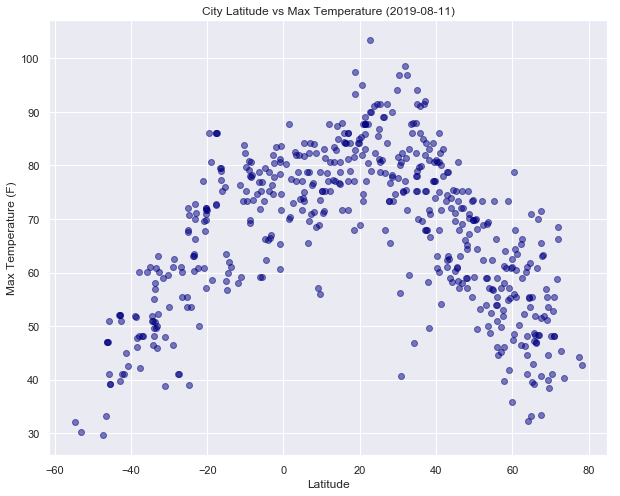

In [8]:
plt.figure(figsize=(10,8))
sns.set()
plt.scatter(WeatherPy_df["Lat"], WeatherPy_df["Max Temp"], color='Navy', alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f'City Latitude vs Max Temperature ({datetime.now().date()})')
plt.savefig("LatVsTemp.png")
plt.show()


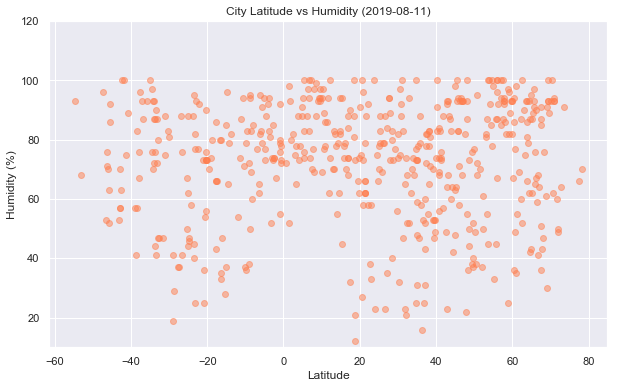

In [9]:
plt.figure(figsize=(10,6))
sns.set()
plt.scatter(WeatherPy_df["Lat"], WeatherPy_df["Humidity"], color='coral', alpha=0.5)
plt.ylim(10,120)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs Humidity ({datetime.now().date()})')
plt.savefig("LatVsHumidity.png")
plt.show()

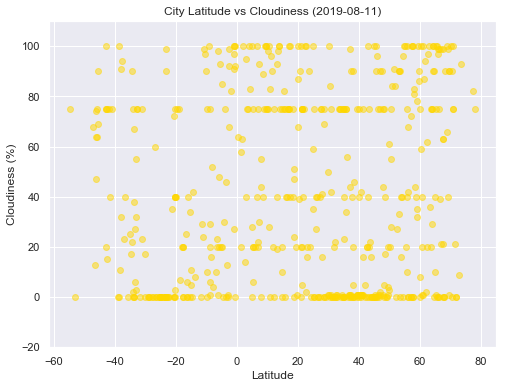

In [10]:

plt.figure(figsize=(8,6))
sns.set()
plt.scatter(WeatherPy_df["Lat"], WeatherPy_df["Cloudiness"], color='gold', alpha=0.5)

plt.ylim(-20,(WeatherPy_df["Cloudiness"].max()+10))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude vs Cloudiness ({datetime.now().date()})')
plt.savefig("LatVsCloudiness.png")
plt.show()

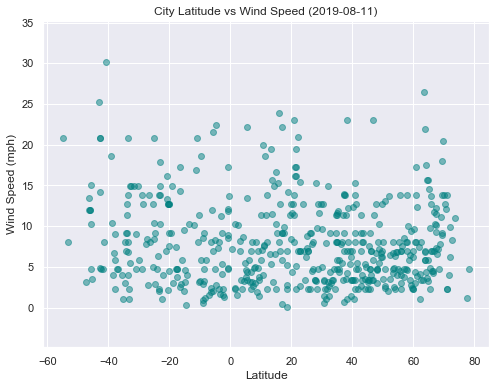

In [11]:
plt.figure(figsize=(8,6))
sns.set()
plt.scatter(WeatherPy_df["Lat"], WeatherPy_df["Wind Speed"], color='teal', alpha=0.5)

plt.ylim((WeatherPy_df["Wind Speed"].min()-5),(WeatherPy_df["Wind Speed"].max()+5))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'City Latitude vs Wind Speed ({datetime.now().date()})')
plt.savefig("LatVsWind.png")
plt.show() 